In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('/Users/mac/Desktop/py/8_MOD/Task_2/fatal-police-shootings-data.csv')
df.sample(10)


,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
3761,4126,Robert Smith,2018-10-20,shot,gun,50.0,M,W,Spanaway,WA,False,other,Not fleeing,False
689,820,Austin Wilburly Reid,2015-09-10,shot,gun,32.0,M,W,Lodi,CA,False,attack,Foot,False
482,594,Richard Munroe,2015-07-05,shot and Tasered,toy weapon,25.0,M,W,Austin,TX,True,attack,Not fleeing,False
3621,3967,TK TK,2018-08-14,shot,gun and knife,NaN,M,H,Fresno,CA,True,attack,Not fleeing,True
377,474,Eric Robinson,2015-05-23,shot,gun,40.0,M,W,Eagar,AZ,False,attack,Car,False
1296,1474,Sylasone Ackhavong,2016-04-19,shot,gun,41.0,M,A,Charlotte,NC,True,attack,Not fleeing,False
3352,3747,Lisa Rivera,2018-05-07,shot,gun,49.0,F,H,Yuma,AZ,False,other,Not fleeing,False
3403,3711,Michael Glad,2018-05-28,shot,gun,23.0,M,W,West Jordan,UT,False,attack,Car,False
3268,3600,Shawn Michael Hubbard,2018-04-10,shot,toy weapon,44.0,M,W,Billings,MT,False,other,Not fleeing,False
3532,3868,Juan Manuel Correa-Leyva,2018-07-17,shot,gun,27.0,M,H,Tucson,AZ,False,attack,Car,False


In [49]:
by_race_illness = df.pivot_table(values=['id'], index=['race', 'signs_of_mental_illness'], aggfunc=len).rename(columns={'id':'count'})
#btw, czy 'count' jest nazwą jakby całej tabeli teraz czy tylko ostatniej kolumny? Jak zrobić, eby była tylko kolumny?
#by_race_illness['count']
by_race_illness

count
race signs_of_mental_illness       
A    False                       69
     True                        24
B    False                     1114
     True                       184
H    False                      745
     True                       157
N    False                       64
     True                        14
O    False                       37
     True                        11
W    False                     1763
     True                       713

In [66]:
#PODPUNKT 3???
#total_signs_true = by_race_illness[by_race_illness.index == True]['id'].sum()
bri = by_race_illness
bri['percentage_of_illness'] = 1 #some function
bri


#by_race_illness.xs('1', level='signs_of_mental_illness')

count  percentage_of_illness
race signs_of_mental_illness                              
A    False                       69                      1
     True                        24                      1
B    False                     1114                      1
     True                       184                      1
H    False                      745                      1
     True                       157                      1
N    False                       64                      1
     True                        14                      1
O    False                       37                      1
     True                        11                      1
W    False                     1763                      1
     True                       713                      1

In [68]:
df.sample(2)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
5301,5800,Ruben Escarrega,2020-05-07,shot,knife,31.0,M,H,Long Beach,CA,False,other,Not fleeing,False
4685,5090,Atatiana Jefferson,2019-10-12,shot,unarmed,28.0,F,B,Fort Worth,TX,False,other,Not fleeing,True


           len
            id
weekday       
Friday     761
Monday     726
Saturday   721
Sunday     753
Thursday   810
Tuesday    816
Wednesday  829


Text(0.5, 1.0, 'Bar Chart of Signs of Mental Illness')

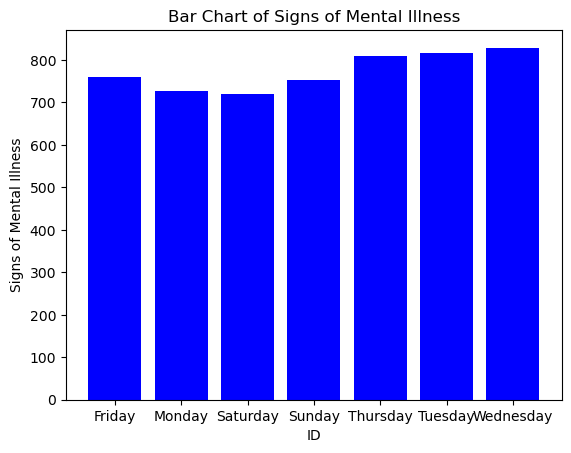

In [99]:
df['weekday'] = df['date'].apply(lambda row: pd.to_datetime(row).day_name())
df.sort_values(by=['weekday'], ascending=0)
byday = df.pivot_table(index=['weekday'], values=['id'], aggfunc=[len])
byday.sort_values(by='weekday', ascending=0) #dlaczego nie sortuje po dniach?
print(byday)

values = byday['len']
values = values['id']

# Tworzenie wykresu słupkowego
categories = byday.index.unique()
plt.bar(categories, values, color='blue')

# Dodawanie etykiet i tytułów
plt.xlabel('ID')
plt.ylabel('Signs of Mental Illness')
plt.title('Bar Chart of Signs of Mental Illness')


In [136]:
popul = pd.read_html('https://simple.wikipedia.org/wiki/List_of_U.S._states_by_population')
popul = popul[0]
popul.columns = ['_', '_', 'state', '_', 'population', '_', '_', '_', '_', '_', '_']
popul = popul.drop('_', axis=1)
popul.sample(5)

,state,population
25,Kentucky,4339367
30,Utah,2763885
38,Idaho,1567582
3,New York,19378102
34,Mississippi,2967297


In [137]:
states = pd.read_html('https://en.wikipedia.org/wiki/List_of_U.S._state_and_territory_abbreviations')
states = states[0]
states.columns = ['state', '_', '_', 'abb', '_', '_', '_', '_', '_', '_']
states.drop('_', axis=1, inplace=True)
#states.drop([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], axis=0, inplace=True)
states.reset_index(inplace=True, drop=True)


states#.sample(5)

,state,abb
0,United States of America,US
1,Alabama,AL
2,Alaska,AK
3,Arizona,AZ
4,Arkansas,AR
...,...,...
73,Nebraska,NaN
74,Northern Mariana Islands,NaN
75,Panama Canal Zone,NaN
76,Philippine Islands,NaN


In [153]:
legend = pd.merge(states, popul, on='state')
legend.sample(5)

,state,abb,population
19,Maine,ME,1328361
41,South Carolina,SC,4625364
16,Kansas,KS,2853118
30,New Hampshire,NH,1316470
11,Hawaii,HI,1360301


In [175]:
state_d = df.groupby(['state']).agg({'state':'count'})
state_d.rename(columns={'state': 'deaths'}, inplace=True)

state_d.reset_index(inplace=True)
state_d.rename(columns={'state': 'abb'}, inplace=True)
state_d['abb'] = state_d['abb'].astype(str)
state_d = pd.merge(legend, state_d, on='abb')
state_d['deaths_per_1000'] = (state_d['deaths'] * 1000) / state_d['population']
state_d




,state,abb,population,deaths,deaths_per_1000
0,Alabama,AL,4779736,104,0.021759
1,Alaska,AK,710231,39,0.054912
2,Arizona,AZ,6392017,254,0.039737
3,Arkansas,AR,2915918,83,0.028464
4,California,CA,37253956,799,0.021447
5,Colorado,CO,5029196,195,0.038774
6,Connecticut,CT,3574097,21,0.005876
7,Delaware,DE,897934,13,0.014478
8,District of Columbia,DC,601723,13,0.021605
9,Florida,FL,18801310,350,0.018616
